Dataset Sample

In [1]:
import pandas as pd

census = {
    "height(cm)":[165, 172, 175, 177, 180, 183, 188, 166, 155, 145, 162, 170, 153, 158],
    "weight(kg)":[64, 72, 74, 75, 82, 82, 88, 55, 51, 42, 53, 64, 51, 52],
    "gender":["male", "male", "male", "male", "male", "male", "male", "female", 
              "female", "female", "female", "female", "female", "female"]
}

censusDf = pd.DataFrame(census)

Dataset Visualisation

Text(0, 0.5, 'Weight (Kg)')

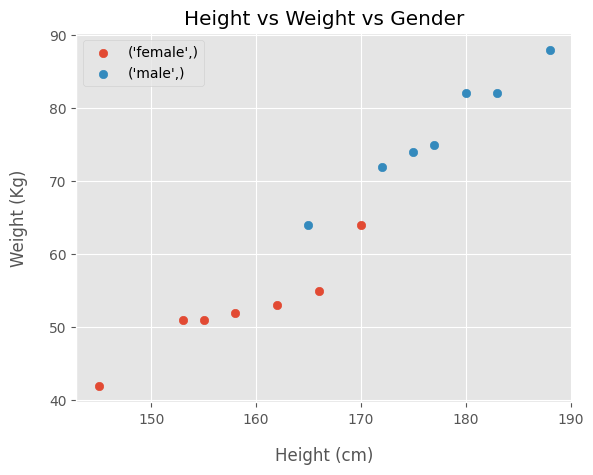

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

fig, ax = plt.subplots()
for g, d in censusDf.groupby(["gender"]):
    ax.scatter(d["height(cm)"], d["weight(kg)"], label=g)
    
plt.legend(loc='upper left')
plt.title("Height vs Weight vs Gender")
plt.xlabel("Height (cm)", labelpad=15)
plt.ylabel("Weight (Kg)", labelpad=15)

Dataset Preprocessing

In [3]:
import numpy as np

X_train = np.array(censusDf[["height(cm)", "weight(kg)"]])
y_train = np.array(censusDf["gender"])

In [4]:

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = y_train.flatten() 

KNN Training Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
K = 3
knModel = KNeighborsClassifier(n_neighbors=K)
knModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

KNN Prediction Training

In [6]:

height = 167
weight = 63
xNew = np.array([[height, weight]]).reshape(1, -1)

In [7]:
yNew = knModel.predict(xNew)
yNew


array([0])

In [8]:
result = lb.inverse_transform(yNew)
result

array(['female'], dtype='<U6')

Testing KNN

In [9]:
X_test = np.array([[172, 69], [155, 45], [166, 58], [171, 70], [168, 64], [186, 84], [182, 74]])
y_test = lb.fit_transform(np.array(["male", "female", "female", "male", "male", "male", "female"])).flatten()


yPred = knModel.predict(X_test)
print(f"Testing: {y_test}\nPrediction: {yPred}")

Testing: [1 0 0 1 1 1 0]
Prediction: [1 0 0 1 1 1 1]


Predict Accuracy

In [10]:

from sklearn.metrics import classification_report
cr = classification_report(y_test, yPred)
print(f"Classification Accuracy of Preditciton Report:\n\n{cr}")

Classification Accuracy of Preditciton Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.80      1.00      0.89         4

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



Predict Accuracy (MCC)

In [13]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, yPred)
print(f"Predict Accuracy w/ MCC:\n\n{mcc}")

Predict Accuracy w/ MCC:

0.7302967433402214


KNN Visualization

Text(0, 0.5, 'Weight (Kg)')

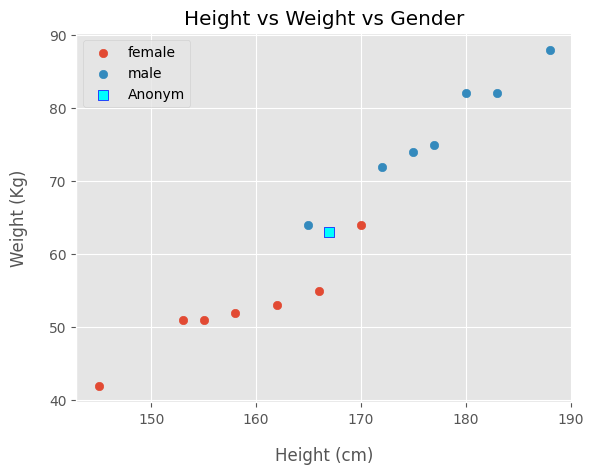

In [11]:
fig, ax = plt.subplots()
for g, d in censusDf.groupby("gender"):
    ax.scatter(d["height(cm)"], d["weight(kg)"], label=g)

plt.scatter(height, weight, label="Anonym", color='cyan', 
            marker="s", edgecolors="blue", linewidths=0.5, s=50)

plt.legend(loc='upper left')
plt.title("Height vs Weight vs Gender")
plt.xlabel("Height (cm)", labelpad=15)
plt.ylabel("Weight (Kg)", labelpad=15)

Distance Calculation w/ Euclidean Distance

Formula: 

 d = √(x1 + x2)² - (y1 + y1)²

In [22]:
from scipy.spatial.distance import euclidean

X = np.array([height, weight])

euDistance = [euclidean(X, d) for d in X_train]
censusDf["distance"] = euDistance
censusDf.sort_values(["distance"])

,height(cm),weight(kg),gender,distance
0,165,64,male,2.236068
11,170,64,female,3.162278
7,166,55,female,8.062258
1,172,72,male,10.295630
10,162,53,female,11.180340
2,175,74,male,13.601471
13,158,52,female,14.212670
3,177,75,male,15.620499
8,155,51,female,16.970563
12,153,51,female,18.439089
